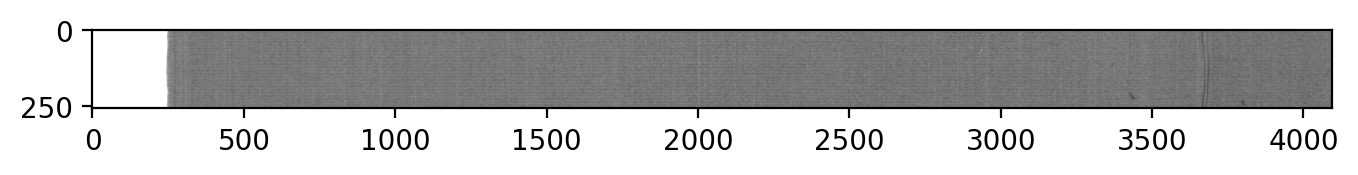

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 200



master = cv2.imread("C:/Users/schof/LeedsUni/year3/individulaProject/tilingCode/0070_023_02.png")

plt.imshow(master)
plt.show()

In [33]:
class Tile:   
    x = 0
    y = 0
    width = 0
    height = 0
    imagex = 0
    imagey = 0
    roi = 0

    def __init__(self,x, y, overlap, width, height):
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.imagex = x * (width - overlap)
        self.imagey = y * (height - overlap)

    def populate(self,master):
        y = self.imagey
        x = self.imagex
        height = self.height
        width = self.width
        self.roi = master[y:y+height, x:x+width]

In [34]:
image = np.array(master)  # can draw on this one, have to use np.copy or eles it passed by reference

t_width = 64
t_height = 64
overlap = 0

# get dimensions of image
dimensions = image.shape
 
# height, width, number of channels in image
height = image.shape[0]
width = image.shape[1]
channels = image.shape[2]

tilesInX = width / (t_width - overlap)
tilesInY = height / (t_height - overlap)

tiles = []

for y in range(int(tilesInY)):
    row = []
    for x in range(int(tilesInX)):
        tile = Tile(x,y,overlap,t_width,t_height)
        tile.populate(master)
        row.append(tile)
    tiles.append(row)
    

    


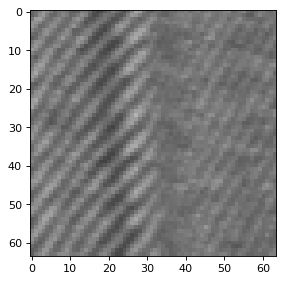

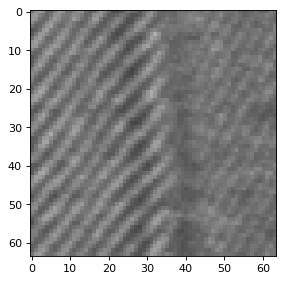

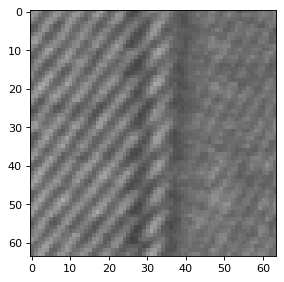

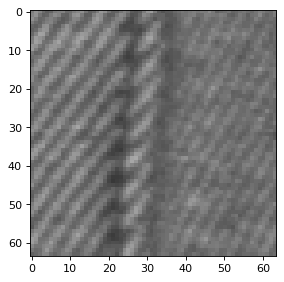

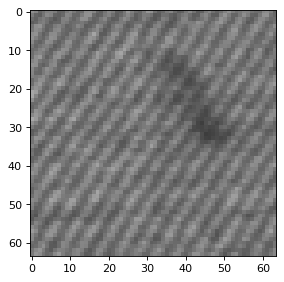

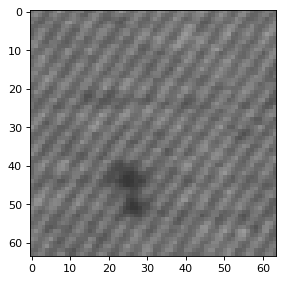

In [35]:
# know bad tiles (57,0), (57,1), (57,2), (57,3), (53,3), (59,3)
t_width = 64
t_height = 64
overlap = 0

defcetTiles = []
defcetTiles.append(Tile(57,0,overlap,t_width,t_height))
defcetTiles[0].populate(master)



defcetTiles.append(Tile(57,1,overlap,t_width,t_height))
defcetTiles[1].populate(master)



defcetTiles.append(Tile(57,2,overlap,t_width,t_height))
defcetTiles[2].populate(master)


defcetTiles.append(Tile(57,3,overlap,t_width,t_height))
defcetTiles[3].populate(master)


defcetTiles.append(Tile(53,3,overlap,t_width,t_height))
defcetTiles[4].populate(master)


defcetTiles.append(Tile(59,3,overlap,t_width,t_height))
defcetTiles[5].populate(master)


plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 80

for tile in defcetTiles:
    plt.imshow(tile.roi)
    plt.show()

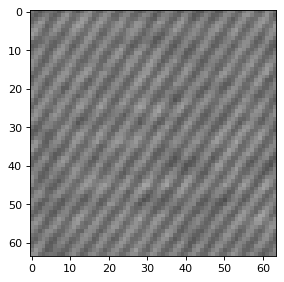

In [36]:
master_Tile1 = Tile(10,0,overlap,t_width,t_height)
master_Tile1.populate(master)

plt.imshow(master_Tile1.roi)

# Method 1: Histogram Comparison
Here I want to see if defective tiles can he compared using historgams. To start we see the histogram of a good tile

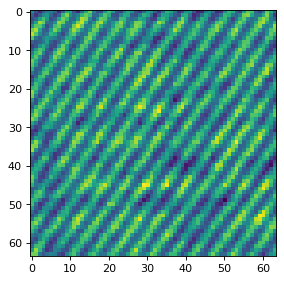

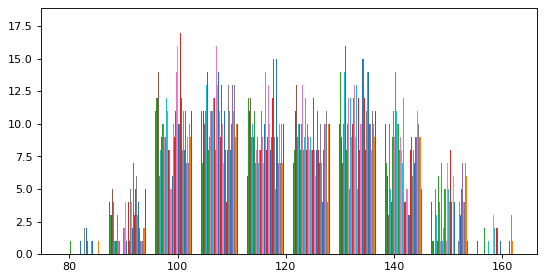

In [40]:
greyMaster = cv2.cvtColor(master_Tile1.roi, cv2.COLOR_BGR2GRAY) # first convert to grey scale

plt.imshow(greyMaster)
plt.show()
plt.hist(greyMaster, bins = 10)
plt.show()


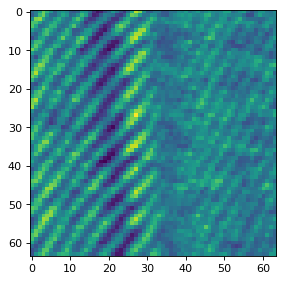

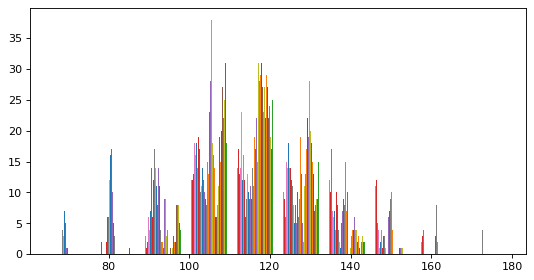

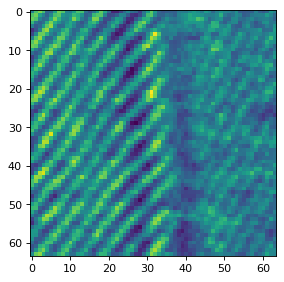

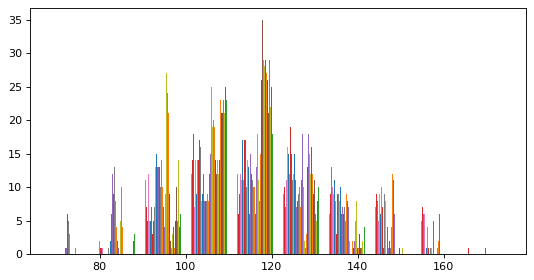

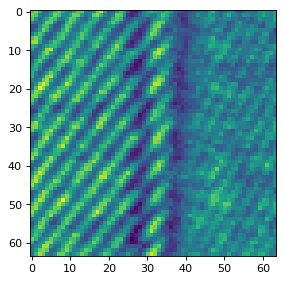

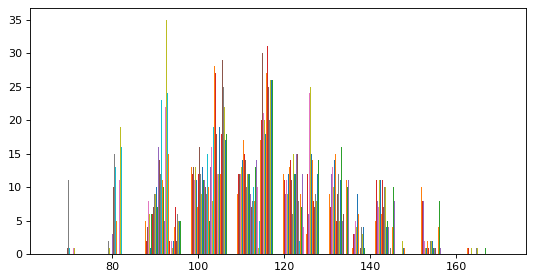

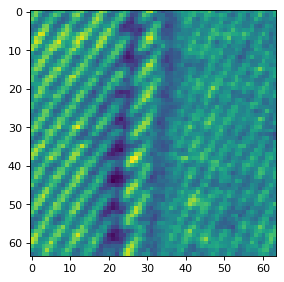

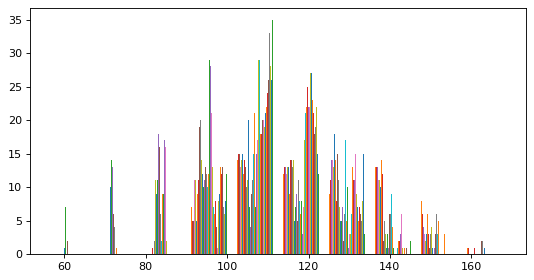

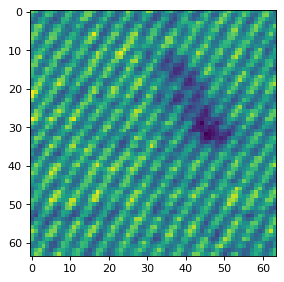

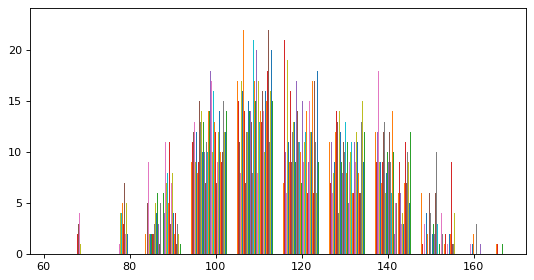

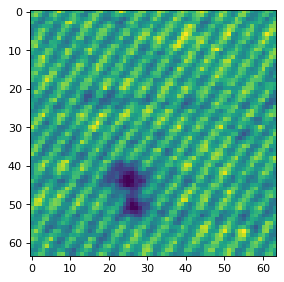

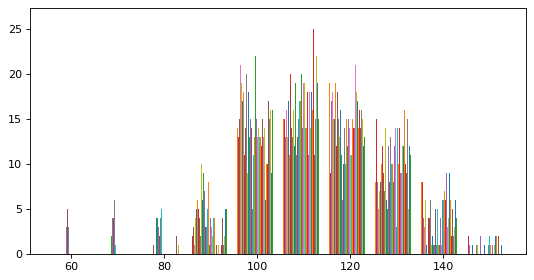

In [39]:
for tile in defcetTiles:
    grey = cv2.cvtColor(tile.roi, cv2.COLOR_BGR2GRAY) # first convert to grey scale
    plt.imshow(grey)
    plt.show()
    plt.hist(grey, bins = 10)
    plt.show()